In [ ]:
import pandas as pd
df = pd.read_csv('./sample_data/AMZN.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5.345000e+03
mean,503.028707,508.599901,496.793142,502.898050,502.898050,6.440373e+06
std,769.605508,778.002400,759.747307,768.981546,768.981546,5.092387e+06
min,5.910000,6.100000,5.510000,5.970000,5.970000,8.813000e+05
25%,41.860001,42.799999,41.160000,42.000000,42.000000,3.603300e+06
50%,140.720001,142.580002,139.070007,140.380005,140.380005,5.316600e+06
75%,571.979980,579.869995,565.299988,573.369995,573.369995,7.688000e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.043292e+08


In [ ]:
price_df = df.loc[:,['Date', 'Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,2000-01-03,89.3750
1,2000-01-04,81.9375
2,2000-01-05,69.7500
3,2000-01-06,65.5625
4,2000-01-07,69.5625


In [ ]:
price_df.set_index(['Date'], inplace=True)

In [ ]:
price_df['center']=price_df['Adj Close'].rolling(window = 20).mean()
price_df.iloc[18:25]

,Adj Close,center
Date,,
2000-01-28,61.6875,NaN
2000-01-31,64.5625,68.050000
2000-02-01,67.4375,66.953125
2000-02-02,69.4375,66.328125
2000-02-03,84.1875,67.050000
2000-02-04,78.5625,67.700000
2000-02-07,75.0000,67.971875


In [ ]:
price_df['ub'] = price_df['center'] + 2*price_df['Adj Close'].rolling(window=20).std()
price_df.iloc[18:25]

,Adj Close,center,ub
Date,,,
2000-01-28,61.6875,NaN,NaN
2000-01-31,64.5625,68.050000,81.306925
2000-02-01,67.4375,66.953125,75.614602
2000-02-02,69.4375,66.328125,71.563203
2000-02-03,84.1875,67.050000,76.531336
2000-02-04,78.5625,67.700000,78.449587
2000-02-07,75.0000,67.971875,79.184861


In [ ]:
price_df['lb'] = price_df['center'] - 2*price_df['Adj Close'].rolling(window=20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
2000-01-28,61.6875,NaN,NaN,NaN
2000-01-31,64.5625,68.050000,81.306925,54.793075
2000-02-01,67.4375,66.953125,75.614602,58.291648
2000-02-02,69.4375,66.328125,71.563203,61.093047
2000-02-03,84.1875,67.050000,76.531336,57.568664
2000-02-04,78.5625,67.700000,78.449587,56.950413
2000-02-07,75.0000,67.971875,79.184861,56.758889


In [ ]:
n = 20
sigma = 2
def bollinger_band(price_df, n, sigma):
  bb = price_df.copy()
  bb['center'] = price_df['Adj Close'].rolling(n).mean()
  bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std()
  bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std()
  return bb
bollinger = bollinger_band(price_df, n, sigma)

In [ ]:
base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,54.360001,50.7840,54.317715,47.250286
2009-01-05,54.060001,51.1210,54.547688,47.694312
2009-01-06,57.360001,51.5760,55.740378,47.411622
2009-01-07,56.200001,51.8155,56.462657,47.168343
2009-01-08,57.160000,52.1110,57.323916,46.898085


In [ ]:
sample = price_df.loc[base_date:]

In [ ]:
book = sample[['Adj Close']].copy()

In [ ]:
book['trade'] = ''
book.head()

,Adj Close,trade
Date,,
2009-01-02,54.360001,
2009-01-05,54.060001,
2009-01-06,57.360001,
2009-01-07,56.200001,
2009-01-08,57.160000,


In [ ]:
def create_trade_book(sample):
  book = sample[['Adj Close']].copy()
  book['trade']=''
  return (book)

In [ ]:
def tradings(sample, book):
  for i in sample.index:
    if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']:
      book.loc[i, 'trade'] = ''
    elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']:
      if book.shift(1).loc[i, 'trade'] == 'buy':
        book.loc[i, 'trade'] = 'buy'
      else:
        book.loc[i, 'trade'] = 'buy' #??????
    elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']:
      if book.shift(1).loc[i, 'trade'] == 'buy':
        book.loc[i, 'trade'] = 'buy'
      else:
        book.loc[i, 'trade'] = ''
  return (book)

In [ ]:
book = tradings(sample, book)
book.tail()

,Adj Close,trade
Date,,
2021-03-25,3046.260010,buy
2021-03-26,3052.030029,buy
2021-03-29,3075.729980,buy
2021-03-30,3055.290039,buy
2021-03-31,3094.080078,buy


In [ ]:
def returns(book):
  rtn = 1.0
  book['return'] = 1
  buy = 0.0
  sell = 0.0
  for i in book.index:
    if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
      buy = book.loc[i, 'Adj Close']
      print('진입일 : ', i, 'long 진입가격 : ', buy)
    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':
      sell = book.loc[i, 'Adj Close']
      rtn = (sell - buy) / buy + 1
      book.loc[i, 'return'] = rtn
      print('청산일 : ', i, 'long 진입가격 : ', buy, ' : long 청산가격 : ', sell, ' : return :', round(rtn, 4))
    if book.loc[i, 'trade'] == '':
      buy = 0.0
      sell = 0.0
  acc_rtn = 1.0
  for i in book.index:
    rtn = book.loc[i, 'return']
    acc_rtn = acc_rtn * rtn
    book.loc[i, 'acc return'] = acc_rtn

  print('Accunlated return :', round(acc_rtn, 4))
  return (round(acc_rtn, 4))

In [ ]:
print(returns(book))

진입일 :  2009-05-13 long 진입가격 :  74.190002
청산일 :  2009-06-01 long 진입가격 :  74.190002  : long 청산가격 :  83.050003  : return : 1.1194
진입일 :  2009-07-07 long 진입가격 :  75.629997
청산일 :  2009-07-20 long 진입가격 :  75.629997  : long 청산가격 :  88.230003  : return : 1.1666
진입일 :  2009-08-31 long 진입가격 :  81.190002
청산일 :  2009-09-16 long 진입가격 :  81.190002  : long 청산가격 :  90.699997  : return : 1.1171
진입일 :  2010-05-04 long 진입가격 :  129.830002
청산일 :  2010-08-04 long 진입가격 :  129.830002  : long 청산가격 :  127.58000200000001  : return : 0.9827
진입일 :  2010-11-16 long 진입가격 :  157.779999
청산일 :  2010-11-24 long 진입가격 :  157.779999  : long 청산가격 :  177.25  : return : 1.1234
진입일 :  2011-01-21 long 진입가격 :  177.419998
청산일 :  2011-03-30 long 진입가격 :  177.419998  : long 청산가격 :  179.419998  : return : 1.0113
진입일 :  2011-06-06 long 진입가격 :  185.690002
청산일 :  2011-06-27 long 진입가격 :  185.690002  : long 청산가격 :  201.25  : return : 1.0838
진입일 :  2011-08-04 long 진입가격 :  201.479996
청산일 :  2011-10-14 long 진입가격 :  201.479996  : long 청산가격 : 

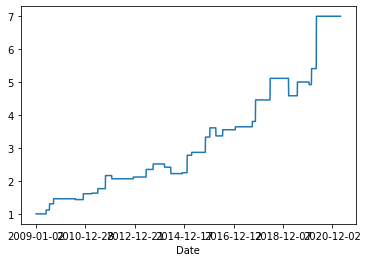

In [ ]:
import matplotlib.pyplot as plt
book['acc return'].plot()